# Digit Recognition on MNIST data-set

### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

### 2. Importing data set

In [2]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print('Train data size:',df.shape,'Test data size:',test.shape)

Train data size: (42000, 785) Test data size: (28000, 784)


In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Normalizing the data

#### a.) Separating the label and pixel values from train data

In [4]:
label=df.iloc[:,:1]
train=df.iloc[:,1:]
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
label.head()

,label
0,1
1,0
2,1
3,4
4,0


In [6]:
print('Train data size:',train.shape,'Label size:',label.shape)

Train data size: (42000, 784) Label size: (42000, 1)


#### b.) Creating a function to normalize the pixel values for analysis

In [7]:
def data_norm(data):
    X=data/255.0
    Y=X.values.reshape(-1,28,28,1)
    return Y

In [8]:
X_train=data_norm(train)
X_train.shape

(42000, 28, 28, 1)

In [9]:
X_test=data_norm(test)
X_test.shape

(28000, 28, 28, 1)

#### c.) One-hot encoding

In [10]:
Y_train=to_categorical(label,num_classes=10)
Y_train.shape

(42000, 10)

### Visual representation of the MNIST data

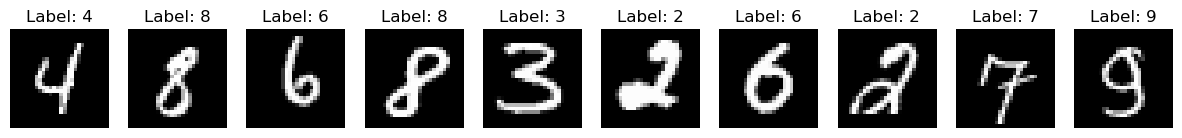

In [11]:
num_samples =10
random_indices = np.random.choice(range(len(X_train)), num_samples, replace=False)

# Plot the images and their predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(Y_train[idx])}")
    plt.axis('off')

plt.show()

### 4. Creating a CNN model

In [12]:
model = Sequential([
    Conv2D(100, kernel_size=(5, 5), activation='relu', input_shape=(28,28, 1)),
    Conv2D(50, kernel_size=(5, 5), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 100)       2600      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 50)        125050    
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 128)               2560128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2689068 (10.26 MB)
Trainable params: 2689068 (10.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



#### The model checkpoint is crucial in result prediction, serving to preserve the optimal model parameters attained throughout training, ensuring the selection of the best-performing model.

In [13]:
check = ModelCheckpoint('best.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

In [14]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### 5. Training the model

In [15]:
history=model.fit(X_train,Y_train, batch_size=128, epochs=5, validation_split=0.2,callbacks=[check])

Epoch 1/5


263/263 [==============================] - 43s 162ms/step - loss: 0.1666 - accuracy: 0.9481 - val_loss: 0.0679 - val_accuracy: 0.9775
Epoch 2/5


C:\Users\madhu\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


263/263 [==============================] - 52s 198ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 3/5
263/263 [==============================] - 52s 196ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0431 - val_accuracy: 0.9873
Epoch 4/5
263/263 [==============================] - 53s 201ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0519 - val_accuracy: 0.9855
Epoch 5/5
263/263 [==============================] - 51s 195ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0531 - val_accuracy: 0.9868


### 6. Results

#### a.) Training and Validation Accuracy Graph

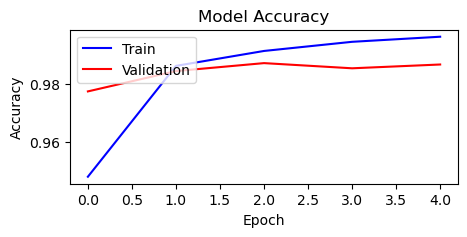

In [16]:
plt.figure(figsize=(5, 2))
plt.plot(model.history.history['accuracy'],color='blue')
plt.plot(model.history.history['val_accuracy'],color='red')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### b.) Training and Validation loss graph

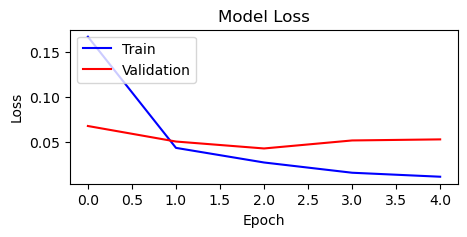

In [17]:
plt.figure(figsize=(5, 2))
plt.plot(model.history.history['loss'], color='blue')  
plt.plot(model.history.history['val_loss'], color='red')  
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### 7. Prediction

#### a.) Loading the best model we saved

In [18]:
new_model=load_model('best.h5')

#### b.) Predicting the labels for the X_test data

In [19]:
prediction=new_model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test,prediction, verbose=2)
print('The test accuracy of this model:',test_acc*100,'%')

875/875 [==============================] - 17s 19ms/step
875/875 - 14s - loss: 0.0661 - accuracy: 0.9884 - 14s/epoch - 16ms/step
The accuracy of this model: 98.83571267127991 %


#### c.) Visual representation of the Test images vs Prediction

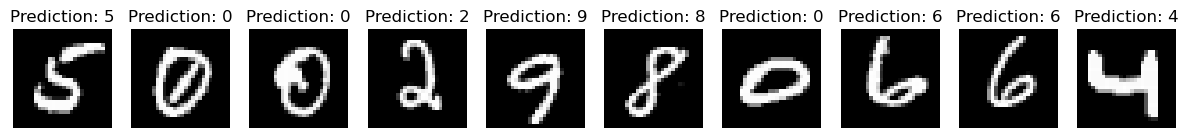

In [20]:
# Randomly select some samples
num_samples =10
random_indices = np.random.choice(range(len(X_test)), num_samples, replace=False)

# Plot the images and their predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {np.argmax(prediction[idx])}")
    plt.axis('off')
plt.show()

#### d.) Storing the predicted values as a csv file digit.csv, containing 28000 rows and 2 columns(ImageID,Label) 

In [21]:
y_test = new_model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_test= pd.Series(y_test, name='Label')
sub = pd.concat([pd.Series(range(1,28001), name="ImageId"), y_test], axis=1)
sub.to_csv('digit.csv', index=False)

875/875 [==============================] - 17s 19ms/step
